# Module 10: Parameter estimation theory and methods

## Outline

- Estimation criteria

- Methods
    - Method of moments
    - Least squares method
    - Maximum likelihood

- Bayesian approach to parameter estimation

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

import scipy.optimize
import scipy.stats
import math

import warnings
warnings.filterwarnings('ignore')


## Parameter estimation theory

Let's denote a probability distribution or model function as

$$ f(x; \theta_1, \theta_2, ..., \theta_m) $$

To use this model to calculate probabilities, we need to estimate the $\theta$s, i.e. we

* obtain a sample of random variabes $x_1$, $x_2$, ..., $x_n$ from the population $X$.
* find estimates for $\theta_i$, denoted $\hat{\theta_i}$ (themselves random varibales)

### Estimation criteria

* **Unbiasedness:** an estimator $\hat{\theta_{}}$ of a parameter $\theta$ is unbiased if
$$E(\hat{\theta})=\theta$$
    - Note: Unbiasedness does not mean $\hat{\theta_{}}$ is equal to $\theta$, only the average of many estimates will equal $\theta$

* **Consistency:** If the sample is large enough, the probability that $\hat{\theta_{}}$ and $\theta$ differ more than en arbitrary constant is zero, i.e.
$$ P \left( \left| \hat{\theta_{}}-\theta \right| > \epsilon \right) \approx 0 $$

* **Efficiency:** if $\hat{\theta_{}}$ is an efficient estimator of $\theta$, then $Var(\hat{\theta_{}})$ is the minimum of all estimators. Sometimes, efficient estimators are referred to as *"best"*.

* **Sufficiency:** An estimator $\hat{\theta_{}}$ of a parameter $\theta$ is said to be sufficient if $\hat{\theta_{}}$ uses all information relevant to $\theta$ that is contained in the sample

## Estimation methods


In [2]:
# generate data that follows an unknown exponential distribution
np.random.seed(1)
a=np.random.uniform(low=1, high=10, size=1)[0]

Xi=np.random.exponential(scale=1./a, size=50)

Xi

array([2.68056420e-01, 2.40640844e-05, 7.57411645e-02, 3.33900658e-02,
       2.03828813e-02, 4.33633592e-02, 8.91981521e-02, 1.06339466e-01,
       1.62829272e-01, 1.14310274e-01, 2.43179371e-01, 4.81201089e-02,
       4.42796044e-01, 5.84230333e-03, 2.33543883e-01, 1.13626876e-01,
       1.72096199e-01, 3.18255032e-02, 4.64473018e-02, 3.39385754e-01,
       7.25874912e-01, 7.91127594e-02, 2.47981146e-01, 4.39833761e-01,
       4.73377260e-01, 1.86988913e-02, 8.38127883e-03, 3.91579067e-02,
       4.42839318e-01, 2.17801464e-02, 1.15004402e-01, 6.66384790e-01,
       1.60266836e-01, 2.47676740e-01, 7.97546130e-02, 2.44037565e-01,
       3.78596411e-01, 3.88319086e-03, 2.91776563e-01, 9.46165246e-01,
       2.90117044e-01, 6.92419945e-02, 3.27615605e-01, 2.29217058e-02,
       1.24971516e-01, 5.03337033e-01, 7.31283771e-02, 7.13965374e-02,
       2.93055135e-02, 4.11448341e-03])

<IPython.core.display.Javascript object>


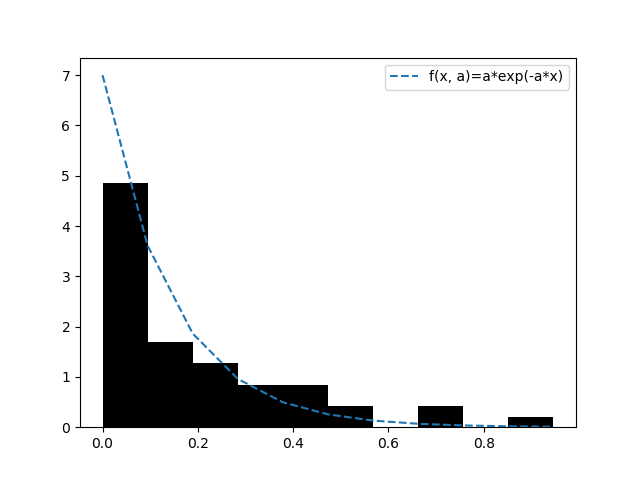

In [5]:
# take a look at the histogram
def exp_pdf(x, shape):
    return shape * np.exp(-shape * x)

(hist_entries, hist_bins, hist_patches)=plt.hist(Xi, normed = True, bins=10,color='k')

plt.plot(hist_bins, exp_pdf(hist_bins, 7), '--', label='f(x, a)=a*exp(-a*x)')
plt.legend()

<IPython.core.display.Javascript object>


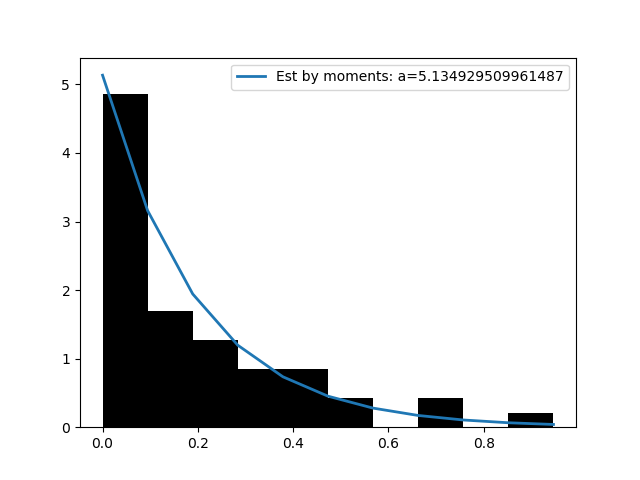

In [6]:
# use the moments to estimate parameters by equalling the first m moments of a distribution 
# to the first m sample moments.
# here, use the first moment to estimate the pdf

first_moment=Xi.mean()

a_mom=1./first_moment

(hist_entries, hist_bins, hist_patches)=plt.hist(Xi, normed = True, bins=10,color='k')

plt.plot(hist_bins, exp_pdf(hist_bins, a_mom), label='Est by moments: a='+str(a_mom), lw=2)
plt.legend()


<IPython.core.display.Javascript object>


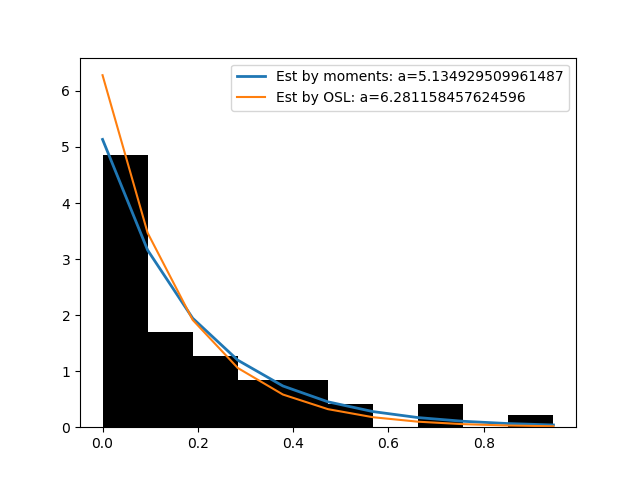

In [9]:
# (Non-linear) Least squares fit of the histogram
# using exp_pdf as score function and the histogram bin centers and entries as data

(hist_entries, hist_bins, hist_patches)=plt.hist(Xi, normed = True, bins=10,color='k')
hist_bin_centers=hist_bins[:-1]+0.5*(hist_bins[1]-hist_bins[0])

popt, pcov = scipy.optimize.curve_fit(exp_pdf, hist_bin_centers, hist_entries)
a_ols=popt[0]

plt.plot(hist_bins, exp_pdf(hist_bins, a_mom), label='Est by moments: a='+str(a_mom), lw=2)
plt.plot(hist_bins, exp_pdf(hist_bins, a_ols), label='Est by OSL: a='+str(a_ols))
plt.legend()

#plt.yscale('log')

#### Maximum likelihood estimates

Let's start by chosing a probability distribution model first, and ask:
How likely is it to observe the sample dataset, given this model?

If we have $n$ **random and independent** observations $x$, the joint probability density of $x$ as a function of parameters $\theta$ is expressed as

$$f(x_1, x_2, ...,x_n | \theta_1,\theta_2,...,\theta_m)
\\= f(x_1 | \theta_1,\theta_2,...,\theta_m) \cdot f(x_2 | \theta_1,\theta_2,...,\theta_m) \cdot ... \cdot f(x_n | \theta_1,\theta_2,...,\theta_m)
\\= \prod_{i=1}^{n} f(x_i | \theta_1,\theta_2,...,\theta_m)
\\= L(x_i; \theta_1,\theta_2,...,\theta_m)$$

This expression is proportional to the probability that the particular random sample would be obtained from the population, and is known as the **likelihood function**.

We find the set of parameters $\theta_1,\theta_2,...,\theta_m$ that maximises the likelihood function, setting $\partial L / \partial \theta$ equal zero.

* As a product of often many small probablities, $L$ can become very small, so it's convinient to take the logarithm of $L$ before taking the derivatives
* The values of the parameters that maximise the sample likelihood are called maximum likelihood estimates, MLEs.
* If actual errors are normally distributed MLE and OLS estimates are the same
* MLE is intuitive and general, but the maximising procedure is slow in general


<IPython.core.display.Javascript object>


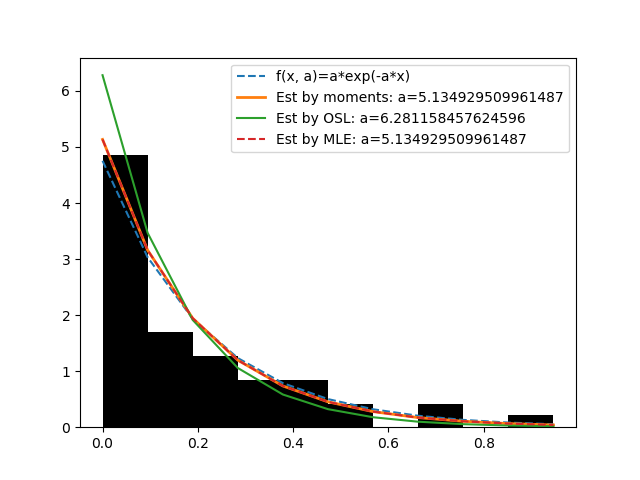

In [10]:
args = scipy.stats.expon.fit(Xi, floc=0) # MLE, forcing zero offset
a_mle=1./args[1]

(hist_entries, hist_bins, hist_patches)=plt.hist(Xi, normed = True, bins=10,color='k')
plt.plot(hist_bins, exp_pdf(hist_bins, a), '--', label='f(x, a)=a*exp(-a*x)')
plt.plot(hist_bins, exp_pdf(hist_bins, a_mom), label='Est by moments: a='+str(a_mom), lw=2)
plt.plot(hist_bins, exp_pdf(hist_bins, a_ols), label='Est by OSL: a='+str(a_ols))
plt.plot(hist_bins, exp_pdf(hist_bins, a_mle), '--', label='Est by MLE: a='+str(a_mle))
plt.legend()

#plt.yscale('log')


In [ ]:
#Comparing estimation methods with many random samples
a=5

a_mles,a_olss,a_moms=[],[],[]
for re in range(1000):
    Xi=np.random.exponential(scale=1./a, size=500)
    
    first_moment=Xi.mean()
    a_mom=1./first_moment
    a_moms.append(a_mom)
    
    #OLS estimate from fitting the exponential to the histogram
    hist_entries, hist_bins = np.histogram(Xi, density=True,bins=100)
    hist_bin_centers=hist_bins[:-1]+0.5*(hist_bins[1]-hist_bins[0])
    popt, pcov = scipy.optimize.curve_fit(exp_pdf, hist_bin_centers, hist_entries)
    a_ols=popt[0]
    
    a_olss.append(a_ols)


(hist_entries, hist_bins, hist_patches)=plt.hist(a_moms, normed = True, color='b', alpha=0.5, label='MoM estimates')
plt.axvline(np.mean(a_moms), color='b')

(hist_entries, hist_bins, hist_patches)=plt.hist(a_olss, normed = True, color='r', alpha=0.5, label='OLS estimates')
plt.axvline(np.mean(a_olss), color='r')

plt.legend()